# Name : Nisrin Dhoondia 

# Email: nisrin.dhoondia@gmail.com  



# Importing the data  


In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999

In [2]:
# uploading the data in google colab
from google.colab import files
uploaded = files.upload()

Saving Sample Data.xlsx to Sample Data.xlsx


In [3]:
# reading the data and assigning to a variable
loanallotment_df = pd.read_excel('Sample Data.xlsx')

# Understanding the data

In [4]:
# all the columns name of the dataset
loanallotment_df.columns

Index(['Period', 'AccountNumber', 'AccountType', 'BorrowerName',
       'IndustryType', 'CounterpartyIndustryType', 'AnyLitigation',
       'LastPaymentDate', 'LastPaymentStatus', 'LastPaymentAmountAvg',
       'AccountBalanceAverage', 'CreditTransactionAmountAverage', 'NetRevenue',
       'CurrentRatio', 'NoOfPastReturns', 'ReturnAmountAverage',
       'TotalReceivableAmount', 'TotalPayableAmount', 'Default'],
      dtype='object')

In [5]:
# renaming the columns
loanallotment_df.rename(columns = {'Period' : 'period', 'AccountNumber' : 'account_number', 'AccountType' : 'account_type', 'BorrowerName' : 'borrower_name',
                                   'IndustryType' : 'industry_type', 'CounterpartyIndustryType' :'counterparty_industrytype', 
                                   'AnyLitigation' : 'anylitigation', 'LastPaymentDate' : 'lastpayment_date', 'LastPaymentStatus' : 'lastpayment_status', 
                                   'LastPaymentAmountAvg' : 'lastpayment_amountavg', 'AccountBalanceAverage' : 'accountbalanceavg', 
                                   'CreditTransactionAmountAverage' : 'credittransaction_amountavg', 'NetRevenue' : 'netrevenue', 
                                   'CurrentRatio' : 'currentratio', 'NoOfPastReturns' : 'totalnum_pastreturns', 'ReturnAmountAverage' : 'returnamountavg',
                                   'TotalReceivableAmount' : 'totalreceivableamount', 'TotalPayableAmount' : 'totalpayableamount', 'Default' : 'default'
                                   }, inplace = True)

In [6]:
# getting brief overview of the dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, 
# how many non-null values it has 
# and memory usage
loanallotment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   period                       19012 non-null  object        
 1   account_number               19012 non-null  int64         
 2   account_type                 19012 non-null  object        
 3   borrower_name                19012 non-null  object        
 4   industry_type                19012 non-null  object        
 5   counterparty_industrytype    19012 non-null  object        
 6   anylitigation                19012 non-null  object        
 7   lastpayment_date             19012 non-null  datetime64[ns]
 8   lastpayment_status           19012 non-null  object        
 9   lastpayment_amountavg        19012 non-null  int64         
 10  accountbalanceavg            19012 non-null  int64         
 11  credittransaction_amountavg  19012 non-nu

In [7]:
# number of columns and rows of the dataset
loanallotment_df.shape

(19012, 19)

In [8]:
# first 5 rows content of the dataset
loanallotment_df.head()

,period,account_number,account_type,borrower_name,industry_type,counterparty_industrytype,anylitigation,lastpayment_date,lastpayment_status,lastpayment_amountavg,accountbalanceavg,credittransaction_amountavg,netrevenue,currentratio,totalnum_pastreturns,returnamountavg,totalreceivableamount,totalpayableamount,default
0,Dec-19,1000001631,Current Account,Borrower-1000001631,Construction Industry,Computer Industry,Yes,2019-11-10,Cleared,270000,13468000,14235000,22205000,1.32,3,86000,130822000,51591000,No
1,Dec-19,1000000227,Term Loan Account,Borrower-1000000227,Health care Industry,Telecommunication industry,No,2019-11-22,Bounced,117000,24995000,29032000,46708000,1.83,2,175000,152972000,38816000,Yes
2,Dec-19,1000000832,Current Account,Borrower-1000000832,Health care Industry,Health care Industry,No,2019-10-17,Bounced,141000,14089000,26401000,45725000,1.63,3,190000,68901000,142547000,Yes
3,Dec-19,1000000187,Term Loan Account,Borrower-1000000187,Food Industry,Pharmaceutical Industry,No,2019-11-10,Cleared,198000,25995000,39570000,11592000,1.73,0,0,103056000,153022000,No
4,Dec-19,1000001368,Term Loan Account,Borrower-1000001368,Transport Industry,Computer Industry,No,2019-12-27,Cleared,228000,21519000,24774000,38511000,1.43,1,92000,117120000,118425000,No


In [9]:
# last 5 rows content of the dataset
loanallotment_df.tail()

,period,account_number,account_type,borrower_name,industry_type,counterparty_industrytype,anylitigation,lastpayment_date,lastpayment_status,lastpayment_amountavg,accountbalanceavg,credittransaction_amountavg,netrevenue,currentratio,totalnum_pastreturns,returnamountavg,totalreceivableamount,totalpayableamount,default
19007,Mar-16,1000001587,Term Loan Account,Borrower-1000001587,Education Industry,Health care Industry,Yes,2016-01-28,Bounced,287000,29680000,29804000,19995000,1.76,1,56000,38246000,148162000,Yes
19008,Mar-16,1000000460,Current Account,Borrower-1000000460,Pharmaceutical Industry,Telecommunication industry,Yes,2016-03-21,Bounced,278000,22602000,28825000,45315000,1.89,0,0,31198000,45073000,No
19009,Mar-16,1000000425,Current Account,Borrower-1000000425,Agriculture industry,Aerospace Industry,Yes,2016-03-19,Bounced,418000,8367000,14105000,30823000,1.96,1,60000,107826000,44251000,No
19010,Mar-16,1000001540,Term Loan Account,Borrower-1000001540,Education Industry,Agriculture industry,Yes,2016-01-03,Cleared,239000,11264000,12047000,41344000,1.52,1,180000,104231000,118651000,No
19011,Mar-16,1000000607,Current Account,Borrower-1000000607,Computer Industry,Health care Industry,Yes,2016-03-14,Bounced,468000,12973000,22842000,29100000,1.88,1,190000,92323000,59201000,No


In [10]:
# dropping account_number and borrower_name as it is not important independent feature for the dependent variable prediction
# nor for analysis of the dataset

# there are others too but we will drop at the later stage

loanallotment_df.drop(['account_number', 'borrower_name'], axis = 1, inplace= True)

In [11]:
# converting period column fro object dtype to datetime dtype
loanallotment_df['period'] = pd.to_datetime(loanallotment_df['period'], format = '%b-%y')

In [12]:
# checking for null values in dataset
loanallotment_df.isnull().sum()

period                         0
account_type                   0
industry_type                  0
counterparty_industrytype      0
anylitigation                  0
lastpayment_date               0
lastpayment_status             0
lastpayment_amountavg          0
accountbalanceavg              0
credittransaction_amountavg    0
netrevenue                     0
currentratio                   0
totalnum_pastreturns           0
returnamountavg                0
totalreceivableamount          0
totalpayableamount             0
default                        0
dtype: int64

In [13]:
# checking for any duplicate records
loanallotment_df.duplicated().sum()

0

In [14]:
# getting all object dtype columns name
object_cols = loanallotment_df.select_dtypes(['object']).columns.tolist()
object_cols

['account_type',
 'industry_type',
 'counterparty_industrytype',
 'anylitigation',
 'lastpayment_status',
 'default']

In [15]:
# getting all number dtype columns name
num_cols = loanallotment_df.select_dtypes(['number']).columns.tolist()
num_cols

['lastpayment_amountavg',
 'accountbalanceavg',
 'credittransaction_amountavg',
 'netrevenue',
 'currentratio',
 'totalnum_pastreturns',
 'returnamountavg',
 'totalreceivableamount',
 'totalpayableamount']

In [16]:
# basic statistical details of all number dtypes columns in the dataset
loanallotment_df.describe()

,lastpayment_amountavg,accountbalanceavg,credittransaction_amountavg,netrevenue,currentratio,totalnum_pastreturns,returnamountavg,totalreceivableamount,totalpayableamount
count,19012.000000,1.901200e+04,1.901200e+04,1.901200e+04,19012.000000,19012.000000,19012.000000,1.901200e+04,1.901200e+04
mean,252682.200715,1.917492e+07,2.608428e+07,3.203578e+07,1.502712,1.492794,115209.499264,1.023523e+08,1.017531e+08
std,113448.539592,7.313928e+06,8.366392e+06,1.269638e+07,0.287630,1.119216,84269.714648,3.918255e+07,3.886944e+07
min,62000.000000,6.049000e+06,6.520000e+06,1.911000e+06,1.000000,0.000000,0.000000,2.943400e+07,3.106100e+07
25%,158000.000000,1.246400e+07,1.959675e+07,2.173200e+07,1.250000,0.000000,0.000000,6.658000e+07,6.629900e+07
50%,247000.000000,1.977550e+07,2.656700e+07,3.474350e+07,1.500000,1.000000,120000.000000,1.062630e+08,1.054840e+08
75%,324000.000000,2.623625e+07,3.256525e+07,4.350800e+07,1.750000,2.000000,197000.000000,1.404152e+08,1.394300e+08
max,500000.000000,2.980700e+07,4.307800e+07,4.922700e+07,2.000000,3.000000,237000.000000,1.584260e+08,1.571800e+08


In [17]:
# Interquartile Range (IQR)
Q1 = loanallotment_df.quantile(0.25)
Q3 = loanallotment_df.quantile(0.75)
IQR = Q3 - Q1
IQR

lastpayment_amountavg            166000.0
accountbalanceavg              13772250.0
credittransaction_amountavg    12968500.0
netrevenue                     21776000.0
currentratio                          0.5
totalnum_pastreturns                  2.0
returnamountavg                  197000.0
totalreceivableamount          73835250.0
totalpayableamount             73131000.0
dtype: float64

In [18]:
# creating a temp dataset having only number dtypes column
temp_df = loanallotment_df.loc[:, 'lastpayment_amountavg' : 'totalpayableamount']
temp_df.head()

,lastpayment_amountavg,accountbalanceavg,credittransaction_amountavg,netrevenue,currentratio,totalnum_pastreturns,returnamountavg,totalreceivableamount,totalpayableamount
0,270000,13468000,14235000,22205000,1.32,3,86000,130822000,51591000
1,117000,24995000,29032000,46708000,1.83,2,175000,152972000,38816000
2,141000,14089000,26401000,45725000,1.63,3,190000,68901000,142547000
3,198000,25995000,39570000,11592000,1.73,0,0,103056000,153022000
4,228000,21519000,24774000,38511000,1.43,1,92000,117120000,118425000


In [19]:
# number of columns and rows of the temp dataset
temp_df.shape

(19012, 9)

In [20]:
# the code below generates an output with the 'True' and 'False' values for each datapoints 
# where the values are 'True' represent the presence of the outlier
outlier_df = temp_df[((temp_df <= (Q1 - 1.5 * IQR)) | (temp_df >= (Q3 + 1.5 * IQR))).all(axis = 1)]
len(outlier_df)

0

In [21]:
# the unique values and its frequency in the object columns of the dataset
for col in object_cols:
  print(col, ':')
  val_counts = round(loanallotment_df[col].value_counts(normalize = True) * 100, 2)
  print(val_counts)
  print()

account_type :
Current Account      59.17
Term Loan Account    40.83
Name: account_type, dtype: float64

industry_type :
Agriculture industry          12.10
Computer Industry             11.15
Pharmaceutical Industry       10.92
Telecommunication industry    10.43
Transport Industry            10.23
Construction Industry          9.43
Aerospace Industry             9.26
Education Industry             8.93
Health care Industry           8.82
Food Industry                  8.74
Name: industry_type, dtype: float64

counterparty_industrytype :
Construction Industry         12.78
Computer Industry             12.46
Agriculture industry          11.91
Transport Industry            10.91
Telecommunication industry    10.64
Health care Industry           9.38
Pharmaceutical Industry        9.35
Aerospace Industry             8.97
Education Industry             7.29
Food Industry                  6.31
Name: counterparty_industrytype, dtype: float64

anylitigation :
Yes    50.22
No     49.78
Nam

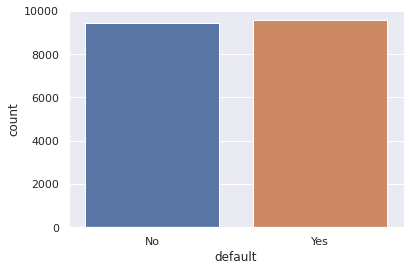

In [22]:
# visualization of dependant variable to check the balance of the dataset
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'default', data = loanallotment_df)
plt.show()

The dataset is balanced and it is not a good sign as it depicts that 50.29% of the total borrower who goes for loan has defaulted the loan payment or rather has failed to pay back the loan amount according to the initial arrangement.
And 49.71% has only paid entire loan amount.

Lets find if we can get some insights on who? and why? borrower default or not their loan payments

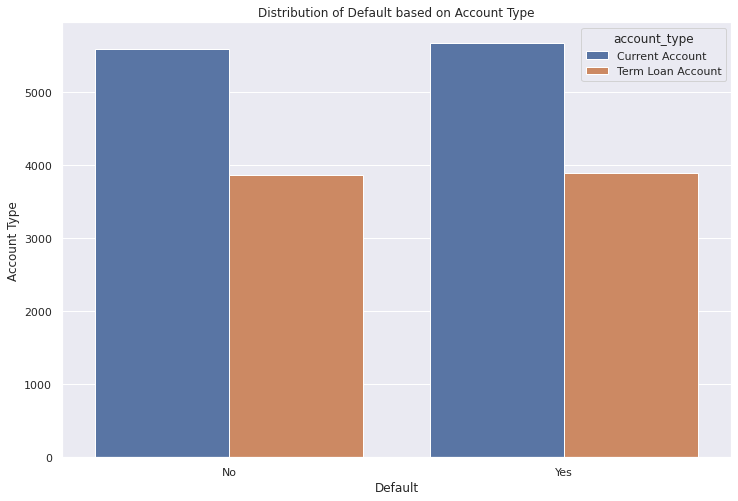

In [23]:
# Default and Account Type
plt.figure(figsize = (12, 8))
sns.set_theme(style = 'darkgrid')
sns.countplot('default', hue = 'account_type', data = loanallotment_df)
plt.title('Distribution of Default based on Account Type')
plt.xlabel('Default', fontsize=12)
plt.ylabel('Account Type', fontsize=12)
plt.show()

Borrower's Account Type doesnot determine whether the loan payment will be defaulted or not

In [24]:
# Default, dependent feature and Industry Type, independent feature

# industry paid loan amount
industry_notdefault = loanallotment_df[loanallotment_df['default'] == 'No']
industry_notdefault['industry_type'].value_counts()

Agriculture industry          1147
Computer Industry             1050
Pharmaceutical Industry       1018
Telecommunication industry     968
Transport Industry             960
Construction Industry          891
Aerospace Industry             870
Education Industry             854
Health care Industry           847
Food Industry                  845
Name: industry_type, dtype: int64

In [25]:
# industry default loan payment
industry_default = loanallotment_df[loanallotment_df['default'] == 'Yes']
industry_default['industry_type'].value_counts()

Agriculture industry          1153
Computer Industry             1070
Pharmaceutical Industry       1059
Telecommunication industry    1015
Transport Industry             984
Construction Industry          902
Aerospace Industry             890
Education Industry             844
Health care Industry           829
Food Industry                  816
Name: industry_type, dtype: int64

In [26]:
industry_default['industry_type'].value_counts().values - industry_notdefault['industry_type'].value_counts().values

array([  6,  20,  41,  47,  24,  11,  20, -10, -18, -29])

In [27]:
industry_default['industry_type'].value_counts().values > industry_notdefault['industry_type'].value_counts().values

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False])

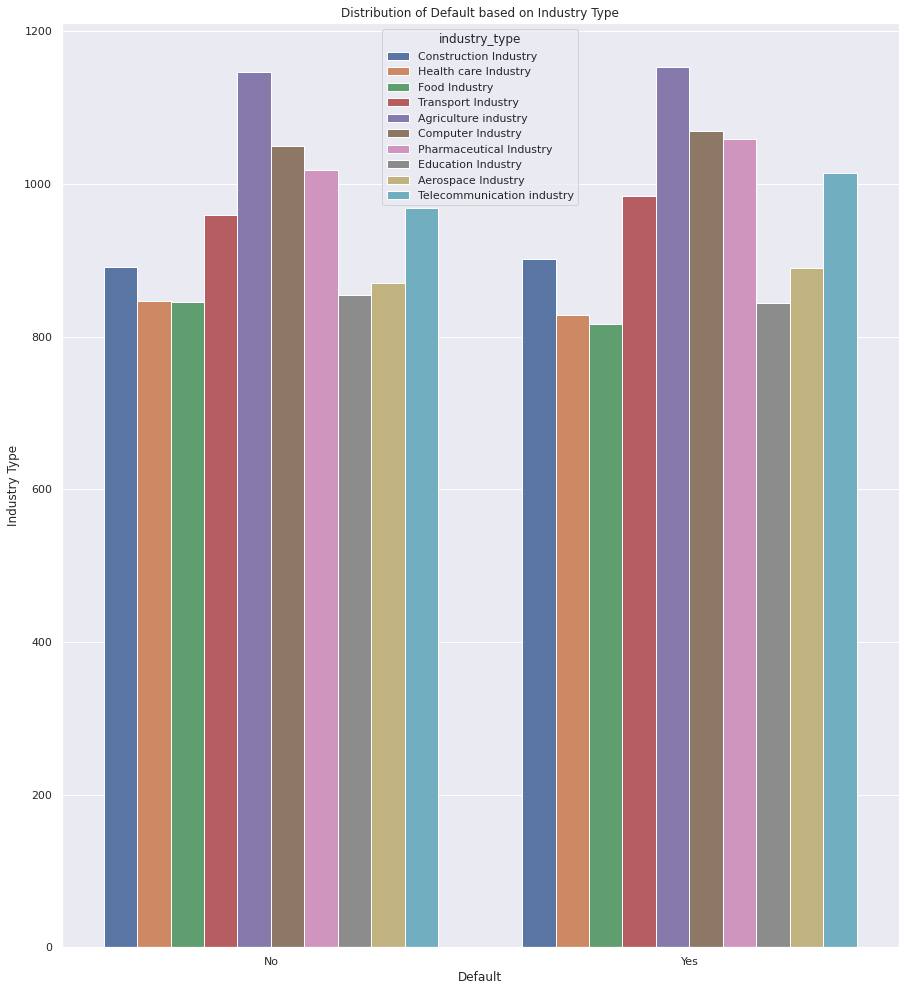

In [28]:
# Default, dependent feature and Industry Type, independent feature
plt.figure(figsize = (15, 17))
sns.set_theme(style = 'darkgrid')
sns.countplot('default', hue = 'industry_type', data = loanallotment_df)
plt.title('Distribution of Default based on Industry Type')
plt.xlabel('Default', fontsize=12)
plt.ylabel('Industry Type', fontsize=12)
plt.show()

Telecommunication industry, Pharmaceutical Industry and Transport Industry have more default compare to full loan payment.

In [29]:
# Default, dependent feature and Credit Transaction Amount Average, independent feature

# borrower who paid loan amount and his Credit Transaction Amount Average
industry_notdefault['credittransaction_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(41237750.0, 43065000.0]    152
(39410500.0, 41237750.0]    285
(37583250.0, 39410500.0]    377
(35756000.0, 37583250.0]    501
(33928750.0, 35756000.0]    590
(32101500.0, 33928750.0]    613
(30274250.0, 32101500.0]    754
(28447000.0, 30274250.0]    803
(26619750.0, 28447000.0]    603
(24792500.0, 26619750.0]    641
(22965250.0, 24792500.0]    597
(21138000.0, 22965250.0]    601
(19310750.0, 21138000.0]    661
(17483500.0, 19310750.0]    549
(15656250.0, 17483500.0]    508
(13829000.0, 15656250.0]    406
(12001750.0, 13829000.0]    329
(10174500.0, 12001750.0]    242
(8347250.0, 10174500.0]     182
(6483454.999, 8347250.0]     56
Name: credittransaction_amountavg, dtype: int64

In [30]:
# borrower who default loan payment and his Credit Transaction Amount Average
industry_default['credittransaction_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(41272550.0, 43078000.0]    131
(39467100.0, 41272550.0]    297
(37661650.0, 39467100.0]    405
(35856200.0, 37661650.0]    537
(34050750.0, 35856200.0]    505
(32245300.0, 34050750.0]    636
(30439850.0, 32245300.0]    730
(28634400.0, 30439850.0]    823
(26828950.0, 28634400.0]    667
(25023500.0, 26828950.0]    628
(23218050.0, 25023500.0]    601
(21412600.0, 23218050.0]    608
(19607150.0, 21412600.0]    607
(17801700.0, 19607150.0]    556
(15996250.0, 17801700.0]    504
(14190800.0, 15996250.0]    425
(12385350.0, 14190800.0]    343
(10579900.0, 12385350.0]    286
(8774450.0, 10579900.0]     190
(6932890.999, 8774450.0]     83
Name: credittransaction_amountavg, dtype: int64

In [31]:
industry_default['credittransaction_amountavg'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['credittransaction_amountavg'].value_counts(bins = 20).sort_index(ascending = False).index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

As seen in the output of the above code that the Credit Transaction Amount Average of defaulter has more amount value compare to non-defaulter

In [32]:
# Default, dependent feature and Account Balance Average, independent feature

# borrower who paid loan amount and his Account Balance Average
industry_notdefault['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False)

(28619100.0, 29807000.0]     745
(27431200.0, 28619100.0]    1003
(26243300.0, 27431200.0]     595
(25055400.0, 26243300.0]     526
(23867500.0, 25055400.0]     451
(22679600.0, 23867500.0]     454
(21491700.0, 22679600.0]     388
(20303800.0, 21491700.0]     359
(19115900.0, 20303800.0]     371
(17928000.0, 19115900.0]     378
(16740100.0, 17928000.0]     372
(15552200.0, 16740100.0]     399
(14364300.0, 15552200.0]     401
(13176400.0, 14364300.0]     421
(11988500.0, 13176400.0]     396
(10800600.0, 11988500.0]     405
(9612700.0, 10800600.0]      443
(8424800.0, 9612700.0]       517
(7236900.0, 8424800.0]       505
(6025241.999, 7236900.0]     321
Name: accountbalanceavg, dtype: int64

In [33]:
# borrower who default loan payment and his Account Balance Average
industry_default['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False)

(28619950.0, 29807000.0]    764
(27432900.0, 28619950.0]    998
(26245850.0, 27432900.0]    642
(25058800.0, 26245850.0]    521
(23871750.0, 25058800.0]    453
(22684700.0, 23871750.0]    446
(21497650.0, 22684700.0]    417
(20310600.0, 21497650.0]    427
(19123550.0, 20310600.0]    373
(17936500.0, 19123550.0]    369
(16749450.0, 17936500.0]    371
(15562400.0, 16749450.0]    372
(14375350.0, 15562400.0]    378
(13188300.0, 14375350.0]    406
(12001250.0, 13188300.0]    408
(10814200.0, 12001250.0]    408
(9627150.0, 10814200.0]     456
(8440100.0, 9627150.0]      484
(7253050.0, 8440100.0]      531
(6042258.999, 7253050.0]    338
Name: accountbalanceavg, dtype: int64

In [34]:
industry_default['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False).index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
industry_default['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False).values > industry_notdefault['accountbalanceavg'].value_counts(bins = 20).sort_index(ascending = False).values

array([ True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True])

But the Account Balance Average of defaulter is more compare to non-defaulter

In [36]:
# Default, dependent feature and Net Revenue, independent feature

# borrower who paid loan amount and his Net Revenue
industry_notdefault['netrevenue'].value_counts(bins = 20).sort_index(ascending = False)

(46861200.0, 49227000.0]     935
(44495400.0, 46861200.0]    1114
(42129600.0, 44495400.0]     747
(39763800.0, 42129600.0]     596
(37398000.0, 39763800.0]     701
(35032200.0, 37398000.0]     565
(32666400.0, 35032200.0]     474
(30300600.0, 32666400.0]     449
(27934800.0, 30300600.0]     443
(25569000.0, 27934800.0]     385
(23203200.0, 25569000.0]     389
(20837400.0, 23203200.0]     389
(18471600.0, 20837400.0]     415
(16105800.0, 18471600.0]     358
(13740000.0, 16105800.0]     392
(11374200.0, 13740000.0]     331
(9008400.0, 11374200.0]      314
(6642600.0, 9008400.0]       277
(4276800.0, 6642600.0]       141
(1863683.999, 4276800.0]      35
Name: netrevenue, dtype: int64

In [37]:
# borrower who default loan payment and his Net Revenue
industry_default['netrevenue'].value_counts(bins = 20).sort_index(ascending = False)

(46870500.0, 49225000.0]     925
(44516000.0, 46870500.0]    1108
(42161500.0, 44516000.0]     765
(39807000.0, 42161500.0]     608
(37452500.0, 39807000.0]     712
(35098000.0, 37452500.0]     585
(32743500.0, 35098000.0]     524
(30389000.0, 32743500.0]     483
(28034500.0, 30389000.0]     449
(25680000.0, 28034500.0]     399
(23325500.0, 25680000.0]     400
(20971000.0, 23325500.0]     362
(18616500.0, 20971000.0]     408
(16262000.0, 18616500.0]     344
(13907500.0, 16262000.0]     334
(11553000.0, 13907500.0]     331
(9198500.0, 11553000.0]      334
(6844000.0, 9198500.0]       288
(4489500.0, 6844000.0]       138
(2087909.999, 4489500.0]      65
Name: netrevenue, dtype: int64

In [38]:
industry_default['netrevenue'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['netrevenue'].value_counts(bins = 20).sort_index(ascending = False).index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

But the Net Revenue of defaulter is more compare to non-defaulter

In [39]:
# Default, dependent feature and Current Ratio, independent feature

# borrower who paid loan amount and his Current Ratio
industry_notdefault['currentratio'].value_counts(bins = 20).sort_index(ascending = False)

(1.95, 2.0]      430
(1.9, 1.95]      455
(1.85, 1.9]      487
(1.8, 1.85]      502
(1.75, 1.8]      483
(1.7, 1.75]      459
(1.65, 1.7]      501
(1.6, 1.65]      486
(1.55, 1.6]      467
(1.5, 1.55]      465
(1.45, 1.5]      465
(1.4, 1.45]      465
(1.35, 1.4]      475
(1.3, 1.35]      468
(1.25, 1.3]      505
(1.2, 1.25]      468
(1.15, 1.2]      453
(1.1, 1.15]      446
(1.05, 1.1]      468
(0.998, 1.05]    502
Name: currentratio, dtype: int64

In [40]:
# borrower who default loan payment and his Current Ratio
industry_default['currentratio'].value_counts(bins = 20).sort_index(ascending = False)

(1.95, 2.0]      478
(1.9, 1.95]      441
(1.85, 1.9]      458
(1.8, 1.85]      467
(1.75, 1.8]      482
(1.7, 1.75]      463
(1.65, 1.7]      510
(1.6, 1.65]      500
(1.55, 1.6]      469
(1.5, 1.55]      494
(1.45, 1.5]      470
(1.4, 1.45]      467
(1.35, 1.4]      477
(1.3, 1.35]      481
(1.25, 1.3]      479
(1.2, 1.25]      523
(1.15, 1.2]      462
(1.1, 1.15]      502
(1.05, 1.1]      444
(0.998, 1.05]    495
Name: currentratio, dtype: int64

In [41]:
industry_default['currentratio'].value_counts(bins = 20).sort_index(ascending = False).values > industry_notdefault['currentratio'].value_counts(bins = 20).sort_index(ascending = False).values

array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False])

Also the Current Ratio of defaulter is good compare to non-defaulter

In [42]:
# Default, dependent feature and Total Loan Amount, independent feature

# borrower who paid loan amount and his Total Loan Amount
industry_notdefault['totalloanamount'] = industry_notdefault['totalreceivableamount'] + industry_notdefault['totalpayableamount']
industry_notdefault['totalloanamount'].value_counts(bins = 20).sort_index(ascending = False)

(300421700.0, 312708000.0]    235
(288135400.0, 300421700.0]    413
(275849100.0, 288135400.0]    446
(263562800.0, 275849100.0]    474
(251276500.0, 263562800.0]    539
(238990200.0, 251276500.0]    553
(226703900.0, 238990200.0]    639
(214417600.0, 226703900.0]    732
(202131300.0, 214417600.0]    843
(189845000.0, 202131300.0]    912
(177558700.0, 189845000.0]    767
(165272400.0, 177558700.0]    592
(152986100.0, 165272400.0]    538
(140699800.0, 152986100.0]    415
(128413500.0, 140699800.0]    361
(116127200.0, 128413500.0]    327
(103840900.0, 116127200.0]    255
(91554600.0, 103840900.0]     229
(79268300.0, 91554600.0]      127
(66736273.999, 79268300.0]     53
Name: totalloanamount, dtype: int64

In [43]:
# borrower who default loan payment and his Total Loan Amount
industry_default['totalloanamount'] = industry_default['totalreceivableamount'] + industry_default['totalpayableamount']
industry_default['totalloanamount'].value_counts(bins = 20).sort_index(ascending = False)

(299658000.0, 311877000.0]    244
(287439000.0, 299658000.0]    437
(275220000.0, 287439000.0]    467
(263001000.0, 275220000.0]    545
(250782000.0, 263001000.0]    567
(238563000.0, 250782000.0]    566
(226344000.0, 238563000.0]    606
(214125000.0, 226344000.0]    685
(201906000.0, 214125000.0]    779
(189687000.0, 201906000.0]    921
(177468000.0, 189687000.0]    784
(165249000.0, 177468000.0]    600
(153030000.0, 165249000.0]    525
(140811000.0, 153030000.0]    403
(128592000.0, 140811000.0]    382
(116373000.0, 128592000.0]    317
(104154000.0, 116373000.0]    294
(91935000.0, 104154000.0]     243
(79716000.0, 91935000.0]      148
(67252619.999, 79716000.0]     49
Name: totalloanamount, dtype: int64

In [44]:
industry_default['totalloanamount'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['totalloanamount'].value_counts(bins = 20).sort_index(ascending = False).index

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True])

And also the Total Loan Amount of defaulter is less compare to non-defaulter

In [45]:
# Default, dependent feature and Any Litigation, independent feature

# borrower who paid loan amount having Any Litigation
industry_notdefault['anylitigation'].value_counts()

Yes    4737
No     4713
Name: anylitigation, dtype: int64

In [46]:
# borrower who default loan payment having Any Litigation
industry_default['anylitigation'].value_counts()

Yes    4811
No     4751
Name: anylitigation, dtype: int64

In [47]:
industry_default['anylitigation'].value_counts().values > industry_notdefault['anylitigation'].value_counts().values

array([ True,  True])

Defaulter has more Any Litigation than non-defaulter and also it is higher in number on not having Any Litigation compare to non-defaulter

In [48]:
# Default, dependent feature and Last Payment Status, independent feature

# borrower who paid loan amount and his Last Payment Status
industry_notdefault['lastpayment_status'].value_counts()

Cleared    4737
Bounced    4713
Name: lastpayment_status, dtype: int64

In [49]:
# borrower who default loan payment and his Last Payment Status
industry_default['lastpayment_status'].value_counts()

Cleared    4811
Bounced    4751
Name: lastpayment_status, dtype: int64

In [50]:
industry_default['lastpayment_status'].value_counts().values > industry_notdefault['lastpayment_status'].value_counts().values

array([ True,  True])

Defaulter is higher in number in both Last Payment Status, Cleared and Bounced compare to non-defaulter

In [51]:
# Default, dependent feature and Last Payment Amount Average, independent feature are Cleared or Bounced

# borrower who paid loan amount and his Last Payment Amount Average are Cleared
notdefault_cleared = industry_notdefault[industry_notdefault['lastpayment_status'] == 'Cleared']
notdefault_cleared['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(478100.0, 500000.0]    149
(456200.0, 478100.0]    131
(434300.0, 456200.0]    187
(412400.0, 434300.0]    118
(390500.0, 412400.0]    163
(368600.0, 390500.0]    114
(346700.0, 368600.0]    172
(324800.0, 346700.0]    142
(302900.0, 324800.0]    166
(281000.0, 302900.0]    392
(259100.0, 281000.0]    478
(237200.0, 259100.0]    236
(215300.0, 237200.0]    326
(193400.0, 215300.0]    294
(171500.0, 193400.0]    304
(149600.0, 171500.0]    311
(127700.0, 149600.0]    340
(105800.0, 127700.0]    354
(83900.0, 105800.0]     199
(61561.999, 83900.0]    161
Name: lastpayment_amountavg, dtype: int64

In [52]:
# borrower who paid loan amount and his Last Payment Amount Average are Bounced
notdefault_bounced = industry_notdefault[industry_notdefault['lastpayment_status'] == 'Bounced']
notdefault_bounced['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(478100.0, 500000.0]    127
(456200.0, 478100.0]    164
(434300.0, 456200.0]    176
(412400.0, 434300.0]    118
(390500.0, 412400.0]    165
(368600.0, 390500.0]    134
(346700.0, 368600.0]    199
(324800.0, 346700.0]    156
(302900.0, 324800.0]    169
(281000.0, 302900.0]    382
(259100.0, 281000.0]    436
(237200.0, 259100.0]    271
(215300.0, 237200.0]    286
(193400.0, 215300.0]    287
(171500.0, 193400.0]    281
(149600.0, 171500.0]    284
(127700.0, 149600.0]    334
(105800.0, 127700.0]    349
(83900.0, 105800.0]     209
(61561.999, 83900.0]    186
Name: lastpayment_amountavg, dtype: int64

In [53]:
# borrower who default loan payment and his Last Payment Amount Average are Cleared
default_cleared = industry_default[industry_default['lastpayment_status'] == 'Cleared']
default_cleared['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(478100.0, 500000.0]    176
(456200.0, 478100.0]    137
(434300.0, 456200.0]    176
(412400.0, 434300.0]    122
(390500.0, 412400.0]    151
(368600.0, 390500.0]    107
(346700.0, 368600.0]    200
(324800.0, 346700.0]    147
(302900.0, 324800.0]    186
(281000.0, 302900.0]    431
(259100.0, 281000.0]    461
(237200.0, 259100.0]    285
(215300.0, 237200.0]    299
(193400.0, 215300.0]    290
(171500.0, 193400.0]    297
(149600.0, 171500.0]    318
(127700.0, 149600.0]    322
(105800.0, 127700.0]    346
(83900.0, 105800.0]     192
(61561.999, 83900.0]    168
Name: lastpayment_amountavg, dtype: int64

In [54]:
# borrower who default loan payment and his Last Payment Amount Average are Bounced
default_bounced = industry_default[industry_default['lastpayment_status'] == 'Bounced']
default_bounced['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False)

(478100.0, 500000.0]    138
(456200.0, 478100.0]    132
(434300.0, 456200.0]    173
(412400.0, 434300.0]    105
(390500.0, 412400.0]    144
(368600.0, 390500.0]    101
(346700.0, 368600.0]    179
(324800.0, 346700.0]    148
(302900.0, 324800.0]    175
(281000.0, 302900.0]    448
(259100.0, 281000.0]    439
(237200.0, 259100.0]    250
(215300.0, 237200.0]    308
(193400.0, 215300.0]    310
(171500.0, 193400.0]    276
(149600.0, 171500.0]    319
(127700.0, 149600.0]    356
(105800.0, 127700.0]    350
(83900.0, 105800.0]     218
(61561.999, 83900.0]    182
Name: lastpayment_amountavg, dtype: int64

In [55]:
# Cleared
default_cleared['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False).values > notdefault_cleared['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False).values

array([ True,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
       False,  True])

In [56]:
# Bounced
default_bounced['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False).values > notdefault_bounced['lastpayment_amountavg'].value_counts(bins = 20).sort_index(ascending = False).values

array([ True, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True, False])

Defaulter are more in number on higher Last Payment Amount Average bin values getting Cleared and are lesser in number on higher Last Payment Amount Average bin values getting Bounced compare to non-defaulter

In [57]:
# Default, dependent feature and Number of Past Returns, independent feature

# borrower who paid loan amount and his Number of Past Returns
industry_notdefault['totalnum_pastreturns'].value_counts()

0    2402
1    2373
2    2357
3    2318
Name: totalnum_pastreturns, dtype: int64

In [58]:
# borrower who default loan payment and his Number of Past Returns
industry_default['totalnum_pastreturns'].value_counts()

0    2419
2    2413
3    2392
1    2338
Name: totalnum_pastreturns, dtype: int64

In [59]:
industry_default['totalnum_pastreturns'].value_counts().values > industry_notdefault['totalnum_pastreturns'].value_counts().values

array([ True,  True,  True,  True])

Defaulter is higher in number in zero Total Number of Past Returns but also higher in number from one to three Total Number of Past Returns compare to non-defaulter

In [60]:
# Default, dependent feature and Return Amount Average, independent feature

# borrower who paid loan amount and his Return Amount Average
industry_notdefault['returnamountavg'].value_counts(bins = 20).sort_index(ascending = False)

(225150.0, 237000.0]     926
(213300.0, 225150.0]     694
(201450.0, 213300.0]     534
(189600.0, 201450.0]     450
(177750.0, 189600.0]     379
(165900.0, 177750.0]     369
(154050.0, 165900.0]     321
(142200.0, 154050.0]     346
(130350.0, 142200.0]     359
(118500.0, 130350.0]     362
(106650.0, 118500.0]     353
(94800.0, 106650.0]      356
(82950.0, 94800.0]       399
(71100.0, 82950.0]       374
(59250.0, 71100.0]       466
(47400.0, 59250.0]       356
(35550.0, 47400.0]         4
(23700.0, 35550.0]         0
(11850.0, 23700.0]         0
(-237.001, 11850.0]     2402
Name: returnamountavg, dtype: int64

In [61]:
# borrower who default loan payment and his Return Amount Average
industry_default['returnamountavg'].value_counts(bins = 20).sort_index(ascending = False)

(225150.0, 237000.0]     924
(213300.0, 225150.0]     757
(201450.0, 213300.0]     554
(189600.0, 201450.0]     482
(177750.0, 189600.0]     396
(165900.0, 177750.0]     350
(154050.0, 165900.0]     310
(142200.0, 154050.0]     357
(130350.0, 142200.0]     355
(118500.0, 130350.0]     352
(106650.0, 118500.0]     348
(94800.0, 106650.0]      388
(82950.0, 94800.0]       376
(71100.0, 82950.0]       362
(59250.0, 71100.0]       453
(47400.0, 59250.0]       374
(35550.0, 47400.0]         5
(23700.0, 35550.0]         0
(11850.0, 23700.0]         0
(-237.001, 11850.0]     2419
Name: returnamountavg, dtype: int64

In [62]:
(industry_default['returnamountavg'].value_counts(bins = 20).sort_index(ascending = False)).values > (industry_notdefault['returnamountavg'].value_counts(bins = 20).sort_index(ascending = False)).values

array([False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True])

Defaulter are less in number on first higher Return Amount Average bin values and also are less in number on many other Return Amount Average bin values compare to non-defaulter

In [63]:
# Default, dependent feature and Total Receivable Amount, independent feature

# borrower who paid loan amount and his Total Receivable Amount
industry_notdefault['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False)

(151969750.0, 158419000.0]     789
(145520500.0, 151969750.0]    1085
(139071250.0, 145520500.0]     663
(132622000.0, 139071250.0]     486
(126172750.0, 132622000.0]     472
(119723500.0, 126172750.0]     409
(113274250.0, 119723500.0]     415
(106825000.0, 113274250.0]     379
(100375750.0, 106825000.0]     377
(93926500.0, 100375750.0]      376
(87477250.0, 93926500.0]       399
(81028000.0, 87477250.0]       345
(74578750.0, 81028000.0]       380
(68129500.0, 74578750.0]       406
(61680250.0, 68129500.0]       383
(55231000.0, 61680250.0]       412
(48781750.0, 55231000.0]       467
(42332500.0, 48781750.0]       517
(35883250.0, 42332500.0]       528
(29305014.999, 35883250.0]     162
Name: totalreceivableamount, dtype: int64

In [64]:
# borrower who default loan payment and his Total Loan Amount
industry_default['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False)

(151980050.0, 158426000.0]     788
(145534100.0, 151980050.0]    1004
(139088150.0, 145534100.0]     686
(132642200.0, 139088150.0]     518
(126196250.0, 132642200.0]     474
(119750300.0, 126196250.0]     460
(113304350.0, 119750300.0]     422
(106858400.0, 113304350.0]     383
(100412450.0, 106858400.0]     421
(93966500.0, 100412450.0]      358
(87520550.0, 93966500.0]       405
(81074600.0, 87520550.0]       358
(74628650.0, 81074600.0]       378
(68182700.0, 74628650.0]       406
(61736750.0, 68182700.0]       412
(55290800.0, 61736750.0]       412
(48844850.0, 55290800.0]       504
(42398900.0, 48844850.0]       522
(35952950.0, 42398900.0]       478
(29378080.999, 35952950.0]     173
Name: totalreceivableamount, dtype: int64

In [65]:
industry_default['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False).index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [66]:
industry_default['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False).values > industry_notdefault['totalreceivableamount'].value_counts(bins = 20).sort_index(ascending = False).values

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True])

Defaulter Total Receivable Amount is higher compare to non-defaulter

In [67]:
# Default, dependent feature and Total Payable Amount, independent feature

# borrower who paid loan amount and his Total Payable Amount
industry_notdefault['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False)

(150882100.0, 157180000.0]    896
(144584200.0, 150882100.0]    958
(138286300.0, 144584200.0]    584
(131988400.0, 138286300.0]    495
(125690500.0, 131988400.0]    450
(119392600.0, 125690500.0]    443
(113094700.0, 119392600.0]    439
(106796800.0, 113094700.0]    385
(100498900.0, 106796800.0]    359
(94201000.0, 100498900.0]     358
(87903100.0, 94201000.0]      357
(81605200.0, 87903100.0]      393
(75307300.0, 81605200.0]      426
(69009400.0, 75307300.0]      401
(62711500.0, 69009400.0]      394
(56413600.0, 62711500.0]      387
(50115700.0, 56413600.0]      441
(43817800.0, 50115700.0]      477
(37519900.0, 43817800.0]      509
(31096041.999, 37519900.0]    298
Name: totalpayableamount, dtype: int64

In [68]:
# borrower who default loan payment and his Total Payable Amount
industry_default['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False)

(150872150.0, 157178000.0]    972
(144566300.0, 150872150.0]    897
(138260450.0, 144566300.0]    634
(131954600.0, 138260450.0]    512
(125648750.0, 131954600.0]    472
(119342900.0, 125648750.0]    418
(113037050.0, 119342900.0]    418
(106731200.0, 113037050.0]    399
(100425350.0, 106731200.0]    388
(94119500.0, 100425350.0]     385
(87813650.0, 94119500.0]      356
(81507800.0, 87813650.0]      352
(75201950.0, 81507800.0]      377
(68896100.0, 75201950.0]      409
(62590250.0, 68896100.0]      406
(56284400.0, 62590250.0]      430
(49978550.0, 56284400.0]      457
(43672700.0, 49978550.0]      483
(37366850.0, 43672700.0]      513
(30934882.999, 37366850.0]    284
Name: totalpayableamount, dtype: int64

In [69]:
industry_default['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False).index > industry_notdefault['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False).index

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [70]:
industry_default['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False).values > industry_notdefault['totalpayableamount'].value_counts(bins = 20).sort_index(ascending = False).values

array([ True, False,  True,  True,  True, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False])

Defaulter Total Payable Amount is less compare to non-defaulter but then the count is more compartively

From all the above output we cannot conclude any factor that can be the cause to lead to default of loan amount payment.  

  * Yes the Credit Transaction Amount Average is more of defaulter compare to non-defaulter  
  * But then Account Balance Average and Net Revenue is more and good respectively compare to non-defaulter too. And also the Total Loan Amount of defaulter is less compare to non-defaulter  
  * Defaulter are higher in number on both having and not having Any Litigation compare to non-defaulter  
  * Defaulter is higher in number in Cleared Last Payment Status, but are also higher in number in Bounced Last Payment Status compare to non-defaulter 
  * But then Defaulter are more in number on higher Last Payment Amount Average bin values getting Cleared and are lesser in number on higher Last Payment Amount Average bin values getting Bounced compare to non-defaulter  
  * Defaulter is higher in number in zero Total Number of Past Returns but also higher in number from one to three Total Number of Past Returns compare to non-defaulter  
  * But then Defaulter are less in number on first higher Return Amount Average bin values and also are less in number on many other Return Amount Average bin values compare to non-defaulter  
  * Defaulter Total Receivable Amount is higher compare to non-defaulter  
  * Defaulter Total Payable Amount is less compare to non-defaulter but then the count is more compartively  

So we need to collect more information for our analysis to find the likely reason that can lead to default of loan amount payment  



Besides studies shows that the most likely reason of default of loan amount payment as below. The below content has been taken from 'An Empirical Analysis of the Loan Default Rate of Microfinance Institutions' Vol.6, No.22, 2014 and it can be found [here](<https://core.ac.uk/download/pdf/234625689.pdf>). 
So as mentioned in this pdf:  

Berger and DeYoung, (1995) indicated that, one major problem which the banks in India are facing is the problem of recovery and overdue of loans. The reasons behind this may vary for different financial institutions as it depends upon the respective nature of loans. Here an attempt is made to find out some of the causes of default of loans due to which financial institutions are facing the problems of overdue of loans. These reasons may be useful for the Banks for the better recovery of loans in future. After surveying different banks, the following were identified to be the main causes of default of loans from industrial sector: improper selection of an entrepreneur, deficient analysis of project viability, inadequacy of collateral security/equitable mortgage against loans, unrealistic terms and schedule of repayment, lack of follow up measures and default due to natural calamities. Ahmad, (1997), mentioned some important factors that cause loan defaults which include; lack of willingness to pay loans coupled with diversion of funds by borrowers, willful negligence and improper appraisal by Credit Officers.  

According to Gorter and Bloem (2002) unsettled loans are mainly caused by an inevitable number of wrong economic decisions by individuals and plain bad luck (inclement weather, unexpected price changes for certain products, etc.). Under such circumstances, the holders of loans can make an allowance for a normal share of nonperformance in the form of bad loan provisions, or they may spread the risk by taking out insurance.  

Moreover, in a recent study of Mortgage loan defaults, the most frequently cited causes of defaults were curtailment of income (36%), excessive obligations (19%), and unemployment (8%), illness of principal mortgagor or family member (6%) and marital difficulties (3%) (Merritt, 2009).  

Okpugie (2009) also indicated that, high interest charged by the microfinance banks has been discovered to be the reason behind the alarming default. A microfinance loan is a facility granted by a microfinance bank to an individual or a group of borrowers, whose principal source of income is derived from business activities involving the production or sale of goods and services.  




# Data preprocessing


Converting object dtype columns to numeric dtype

In [71]:
for col in object_cols:
  loanallotment_df[col] = loanallotment_df[col].astype('category').cat.codes

In [72]:
loanallotment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   period                       19012 non-null  datetime64[ns]
 1   account_type                 19012 non-null  int8          
 2   industry_type                19012 non-null  int8          
 3   counterparty_industrytype    19012 non-null  int8          
 4   anylitigation                19012 non-null  int8          
 5   lastpayment_date             19012 non-null  datetime64[ns]
 6   lastpayment_status           19012 non-null  int8          
 7   lastpayment_amountavg        19012 non-null  int64         
 8   accountbalanceavg            19012 non-null  int64         
 9   credittransaction_amountavg  19012 non-null  int64         
 10  netrevenue                   19012 non-null  int64         
 11  currentratio                 19012 non-nu

In [73]:
# basic statistical details
loanallotment_df.describe()

,account_type,industry_type,counterparty_industrytype,anylitigation,lastpayment_status,lastpayment_amountavg,accountbalanceavg,credittransaction_amountavg,netrevenue,currentratio,totalnum_pastreturns,returnamountavg,totalreceivableamount,totalpayableamount,default
count,19012.000000,19012.000000,19012.000000,19012.000000,19012.000000,19012.000000,1.901200e+04,1.901200e+04,1.901200e+04,19012.000000,19012.000000,19012.000000,1.901200e+04,1.901200e+04,19012.000000
mean,0.408321,4.469335,4.408900,0.502209,0.502209,252682.200715,1.917492e+07,2.608428e+07,3.203578e+07,1.502712,1.492794,115209.499264,1.023523e+08,1.017531e+08,0.502946
std,0.491536,2.922122,2.945575,0.500008,0.500008,113448.539592,7.313928e+06,8.366392e+06,1.269638e+07,0.287630,1.119216,84269.714648,3.918255e+07,3.886944e+07,0.500004
min,0.000000,0.000000,0.000000,0.000000,0.000000,62000.000000,6.049000e+06,6.520000e+06,1.911000e+06,1.000000,0.000000,0.000000,2.943400e+07,3.106100e+07,0.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,158000.000000,1.246400e+07,1.959675e+07,2.173200e+07,1.250000,0.000000,0.000000,6.658000e+07,6.629900e+07,0.000000
50%,0.000000,4.000000,4.000000,1.000000,1.000000,247000.000000,1.977550e+07,2.656700e+07,3.474350e+07,1.500000,1.000000,120000.000000,1.062630e+08,1.054840e+08,1.000000
75%,1.000000,7.000000,7.000000,1.000000,1.000000,324000.000000,2.623625e+07,3.256525e+07,4.350800e+07,1.750000,2.000000,197000.000000,1.404152e+08,1.394300e+08,1.000000
max,1.000000,9.000000,9.000000,1.000000,1.000000,500000.000000,2.980700e+07,4.307800e+07,4.922700e+07,2.000000,3.000000,237000.000000,1.584260e+08,1.571800e+08,1.000000


In [74]:
df_cols = loanallotment_df.columns.tolist()
df_cols.remove('default')
df_cols.remove('period')
df_cols.remove('lastpayment_date')
df_cols

['account_type',
 'industry_type',
 'counterparty_industrytype',
 'anylitigation',
 'lastpayment_status',
 'lastpayment_amountavg',
 'accountbalanceavg',
 'credittransaction_amountavg',
 'netrevenue',
 'currentratio',
 'totalnum_pastreturns',
 'returnamountavg',
 'totalreceivableamount',
 'totalpayableamount']

In [75]:
# finding the mean relationship of independent variables with the dependent variable

loanallotment_df.pivot_table(df_cols, ['default'], aggfunc = np.mean)

,account_type,accountbalanceavg,anylitigation,counterparty_industrytype,credittransaction_amountavg,currentratio,industry_type,lastpayment_amountavg,lastpayment_status,netrevenue,returnamountavg,totalnum_pastreturns,totalpayableamount,totalreceivableamount
default,,,,,,,,,,,,,,
0,0.409206,1.914487e+07,0.501270,4.457989,2.603979e+07,1.503941,4.460635,253160.423280,0.501270,3.198200e+07,114732.380952,1.485820,1.016686e+08,1.024158e+08
1,0.407446,1.920462e+07,0.503137,4.360385,2.612825e+07,1.501499,4.477933,252209.579586,0.503137,3.208892e+07,115681.029073,1.499686,1.018366e+08,1.022896e+08


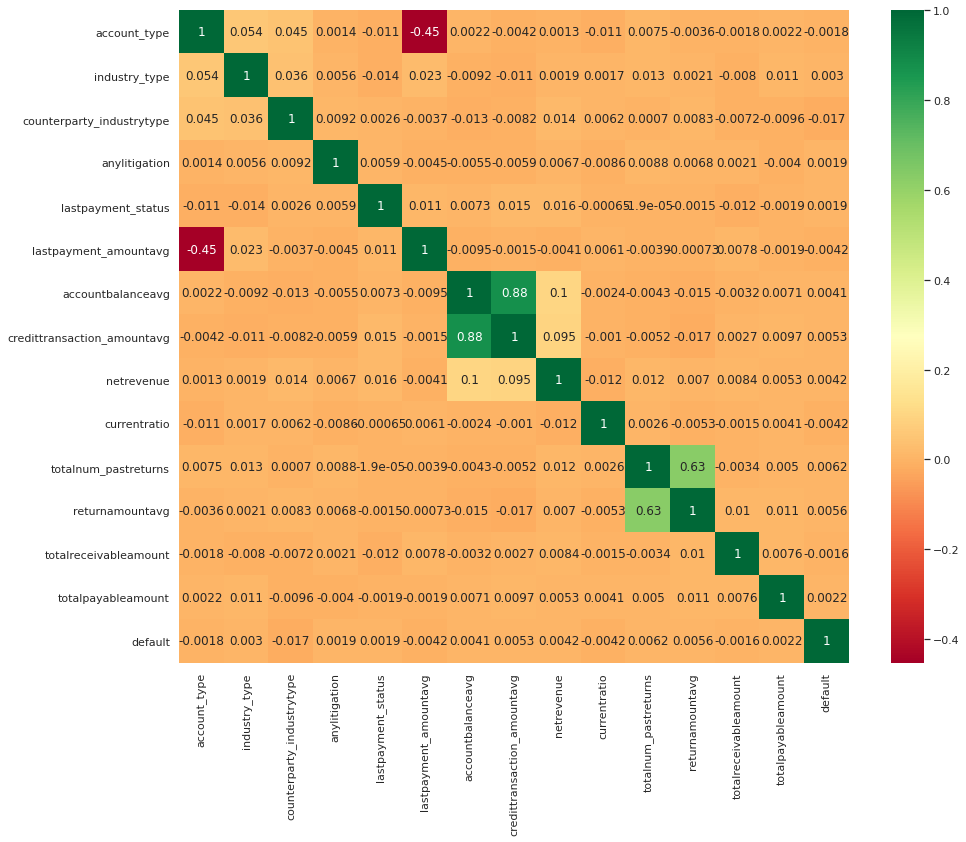

In [76]:
# finding the correlation between all the variables in the dataset
plt.figure(figsize = (15, 12))
sns.heatmap(loanallotment_df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

From above correlation matrix shows  
  * The independent features Account Balance Average and Credit Transaction Amount Average are highly positive correlated  
  * And the independent features Total Number of Past Returns and Return Amount Average are highly positive correlated  
  * The independent features Account Balance Average and  Net Revenue are weakly positive correlated 
  * And the independent features Credit Transaction Amount Average and Net Revenue are weakly positive correlated 
  
And when independent variables are correlated, means that changes in one variable will make changes in another variable value too. So we have to drop one of the correlated independent feature as it becomes difficult for the model to know the relationship between each independent variable and the dependent variable as the correlated independent variables tend to change together  

Also a positive correlation values between independent and dependent variable indicates a positive relation, a value of 1 means highly positive correlation  

And a negative correlation values between independent and dependent variable indicates a negative relation, a value of -1 means highly negative correlation




In [77]:
# understanding the correlation between each independent variable and dependent variable
# same output what is shown in heatmap correlation matrix between each independent variable and dependent variable
# the below code gives
# pearsonr(x, y)
# Pearson correlation coefficient and p-value for testing non-correlation
# here only pearson correlation is picked
import scipy.stats as stats

pearson_correlation = {}
for col in df_cols:
  pearson_correlation[col] = round(stats.pearsonr(loanallotment_df[col], loanallotment_df['default'])[0], 4)


pearson_correlation

{'account_type': -0.0018,
 'accountbalanceavg': 0.0041,
 'anylitigation': 0.0019,
 'counterparty_industrytype': -0.0166,
 'credittransaction_amountavg': 0.0053,
 'currentratio': -0.0042,
 'industry_type': 0.003,
 'lastpayment_amountavg': -0.0042,
 'lastpayment_status': 0.0019,
 'netrevenue': 0.0042,
 'returnamountavg': 0.0056,
 'totalnum_pastreturns': 0.0062,
 'totalpayableamount': 0.0022,
 'totalreceivableamount': -0.0016}

# Building and training the datamodel using Machine Learning Classifier Algorithm

Preparing training dataset and test dataset

In [78]:
# initializing the X (independent variables) and y (dependent variable)
# dropping 'period', 'lastpayment_date' as datetime variable in not required
# dropping 'accountbalanceavg', 'netrevenue' as seen in above code and just keeping 'credittransaction_amountavg' instead
# dropping 'totalnum_pastreturns' as seen in above code and just keeping 'returnamountavg' instead
X = loanallotment_df.drop(['default', 'period', 'lastpayment_date', 'accountbalanceavg', 'netrevenue', 'totalnum_pastreturns'], axis = 1) 
y = loanallotment_df['default']

In [79]:
# updating df_cols list
df_cols.remove('accountbalanceavg')
df_cols.remove('netrevenue')
df_cols.remove('totalnum_pastreturns')

In [80]:
# StratifiedShuffleSplit to split X (independent variables) into train and test dataset 
# and similar y into train and test dependent variable for train and test dataset respectively
# StratifiedShuffleSplit returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class, 
# this ensures there won't be any/quite negligible bias prediction by the model.
# splitting train and test dataset with 80:20 ratio with 10 fold.

from sklearn.model_selection import StratifiedShuffleSplit

strat_shuffledsplit = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
for train_index, test_index in strat_shuffledsplit.split(X, y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

In [81]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15209, 11), (15209,), (3803, 11), (3803,))

In [82]:
# normalizing the dataset
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmax_Xtrain = minmaxscaler.fit_transform(X_train)
minmax_Xtrain = pd.DataFrame(minmax_Xtrain, columns = df_cols)

In [83]:
minmax_Xtest = minmaxscaler.transform(X_test)
minmax_Xtest =pd.DataFrame(minmax_Xtest, columns = df_cols)

In [84]:
from xgboost import XGBClassifier, plot_importance
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV

In [85]:
# building datamodel using basic XGBClassifier Algorithm
xgbmodel = XGBClassifier(random_state = 42)
# traning the model
xgbmodel.fit(minmax_Xtrain, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Feature Importances :  [0.         0.11804999 0.076778   0.05907426 0.11556925 0.10451991
 0.11292075 0.10224491 0.10169306 0.09871183 0.110438  ]


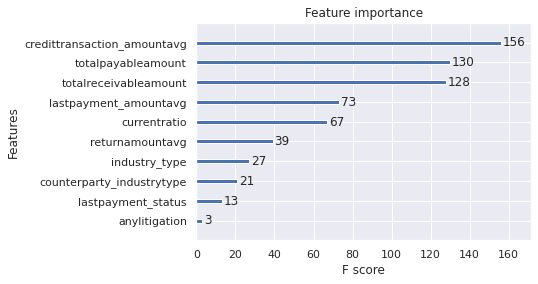

In [86]:
# best feature selected by XGBClassifier Algorithm
print('Feature Importances : ', xgbmodel.feature_importances_)
plot_importance(xgbmodel)
plt.show()

In [87]:
# getting the best features and transforming our X_train and X_test features
selection = SelectFromModel(xgbmodel)
selection.fit(minmax_Xtrain, y_train)

# Transform the train and test features
selectedminmax_Xtrain = selection.transform(minmax_Xtrain)
selectedminmax_Xtest = selection.transform(minmax_Xtest)

selectedminmax_Xtrain.shape, selectedminmax_Xtest.shape

((15209, 8), (3803, 8))

In [88]:
# building datamodel using XGBClassifier Algorithm with hyperparameter tuning
xgbmodel_select = XGBClassifier(
    odjective= 'binary:logistic',
    seed = 42
)

xgbc_parameters_select = {
    'n_estimator' : [100, 200, 500, 1000],
    'max_depth' : range (2,10,1),
    'learning_rate': [0.1, 0.01, 0.05]
}

xgbc_gs_select = GridSearchCV(
    estimator = xgbmodel_select,
    param_grid = xgbc_parameters_select,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose = True
)

In [89]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [90]:
# training the model
xgbc_gs_select.fit(selectedminmax_Xtrain, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   21.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.5min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  7.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 14.2min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 18.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     odjective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
 

In [91]:
# printing which are the best parameter selected
xgbc_gs_select.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimator=100,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', odjective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, verbosity=1)

In [92]:
# predicting the test dataset
xgbc_select_prediction = xgbc_gs_select.predict(selectedminmax_Xtest)

Datamodel evaluation

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

In [94]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, xgbc_select_prediction).ravel()     
# ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 1015
True Negative 856
False Positive 1034
False Negative 898


In [95]:
# calculating the accuracy_score
xgbc_accuracyscore = accuracy_score(y_test, xgbc_select_prediction)
print('accuracy_score: ',  xgbc_accuracyscore)

accuracy_score:  0.49198001577701816


In [96]:
# calculating the roc_auc score
xgbc_rocaucscore = roc_auc_score(y_test, xgbc_select_prediction)
print('roc_auc_score: ', xgbc_rocaucscore)

roc_auc_score:  0.49174514668503166


In [97]:
# classification report
print(classification_report(y_test, xgbc_select_prediction))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47      1890
           1       0.50      0.53      0.51      1913

    accuracy                           0.49      3803
   macro avg       0.49      0.49      0.49      3803
weighted avg       0.49      0.49      0.49      3803



Model No 2

In [98]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42)

dtc_parameters = {
    'max_depth' : range (2,10,1),
    'min_samples_leaf' : [2, 4],
    'criterion' : ['gini', 'entropy']
}

dtc_gs = GridSearchCV(
    estimator = dtc,
    param_grid = dtc_parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose = True
)

In [99]:
# training the model
dtc_gs.fit(minmax_Xtrain, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    1.3s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:    8.9s
[Parallel(n_jobs=10)]: Done 320 out of 320 | elapsed:   19.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [100]:
# printing which are the best parameter selected
dtc_gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [101]:
# predicting the test dataset
dtc_prediction = dtc_gs.predict(minmax_Xtest)

Datamodel 2 evaluation

In [102]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, dtc_prediction).ravel()     
# ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 1236
True Negative 630
False Positive 1260
False Negative 677


In [103]:
# calculating the accuracy_score
dtc_accuracyscore = accuracy_score(y_test, dtc_prediction)
print('accuracy_score: ',  dtc_accuracyscore)

accuracy_score:  0.4906652642650539


In [104]:
# calculating the roc_auc score
dtc_rocaucscore = roc_auc_score(y_test, dtc_prediction)
print('roc_auc_score: ', dtc_rocaucscore)

roc_auc_score:  0.4897194633211361


In [105]:
# classification report
print(classification_report(y_test, dtc_prediction))

              precision    recall  f1-score   support

           0       0.48      0.33      0.39      1890
           1       0.50      0.65      0.56      1913

    accuracy                           0.49      3803
   macro avg       0.49      0.49      0.48      3803
weighted avg       0.49      0.49      0.48      3803



Model No 3

In [106]:
from sklearn.ensemble import RandomForestClassifier

# building datamodel using basic RandomForestClassifier Algorithm

rfcmodel = RandomForestClassifier(random_state=42)

# training the model
rfcmodel.fit(minmax_Xtrain, y_train)

# best feature selected by XGBClassifier Algorithm

feature_importance = rfcmodel.feature_importances_.tolist()
lst = []
for x in range(len(df_cols)):
  lst.append((df_cols[x], feature_importance[x]))
lst.sort(key = lambda x: x[1], reverse = True)

lst

[('credittransaction_amountavg', 0.149316493357826),
 ('totalpayableamount', 0.14782736707515184),
 ('totalreceivableamount', 0.14708492445557494),
 ('lastpayment_amountavg', 0.13332756233248347),
 ('currentratio', 0.12457815096927267),
 ('returnamountavg', 0.10743667610610533),
 ('industry_type', 0.06795690798121008),
 ('counterparty_industrytype', 0.06556152598607165),
 ('anylitigation', 0.020002742490430204),
 ('lastpayment_status', 0.01989667816336277),
 ('account_type', 0.017010971082511123)]

In [107]:
#getting the best features and transforming our X_train and X_test features
rfcselection = SelectFromModel(rfcmodel)
rfcselection.fit(minmax_Xtrain, y_train)

# Transform the train and test features
rfcselectedminmax_Xtrain = rfcselection.transform(minmax_Xtrain)
rfcselectedminmax_Xtest = rfcselection.transform(minmax_Xtest)

rfcselectedminmax_Xtrain.shape, rfcselectedminmax_Xtest.shape

((15209, 6), (3803, 6))

In [108]:
# building datamodel using RandomForestClassifier Algorithm with hyperparameter tuning
rfcmodel_select = RandomForestClassifier(random_state=42)
rfc_parameters_select = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2, 5, 8, 10],
    'max_features': ['auto', 'sqrt'],
    'criterion' : ['entropy', 'gini'],
    'min_samples_split': [2],
    'min_samples_leaf': [1,2],
}


rfc_gs_select = GridSearchCV(estimator=rfcmodel_select, param_grid = rfc_parameters_select, scoring = 'roc_auc', cv = 10, n_jobs = -1)

In [109]:
# traning the model
rfc_gs_select.fit(rfcselectedminmax_Xtrain, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [110]:
#printing which are the best parameter selected
rfc_gs_select.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [111]:
rfcmodel_select_prediction = rfc_gs_select.predict(rfcselectedminmax_Xtest)

Datamodel 3 evaluation

In [112]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, rfcmodel_select_prediction).ravel()     
# ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 1113
True Negative 777
False Positive 1113
False Negative 800


In [113]:
# calculating the accuracy_score
rfc_accuracyscore = accuracy_score(y_test, rfcmodel_select_prediction)
print('accuracy_score: ', rfc_accuracyscore)

accuracy_score:  0.49697607152248224


In [114]:
# calculating the roc_auc score
rfc_rocaucscore = roc_auc_score(y_test, rfcmodel_select_prediction)
print('roc_auc_score: ', rfc_rocaucscore)

roc_auc_score:  0.49645989429052684


In [115]:
# classification report
print(classification_report(y_test, rfcmodel_select_prediction))

              precision    recall  f1-score   support

           0       0.49      0.41      0.45      1890
           1       0.50      0.58      0.54      1913

    accuracy                           0.50      3803
   macro avg       0.50      0.50      0.49      3803
weighted avg       0.50      0.50      0.49      3803



Model No. 4

In [116]:
from sklearn.linear_model import LogisticRegression

# creating the object of LogisticRegression model and assigning it to a variable
lr_model = LogisticRegression(max_iter=1000, random_state= 42)

# training the model
lr_model.fit(minmax_Xtrain,y_train)

# prediction of Response in test dataset
lrmodel_prediction = lr_model.predict(minmax_Xtest)

Datamodel 4 evaluation

In [117]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, lrmodel_prediction).ravel()     
# ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 1117
True Negative 761
False Positive 1129
False Negative 796


In [118]:
# calculating the accuracy_score
lr_accuracyscore = accuracy_score(y_test, lrmodel_prediction)
print('accuracy_score: ',  lr_accuracyscore)

accuracy_score:  0.49382066789376805


In [119]:
# calculating the roc_auc score
lr_rocaucscore = roc_auc_score(y_test, lrmodel_prediction)
print('roc_auc_score: ', lr_rocaucscore)

roc_auc_score:  0.49327256836404776


In [120]:
# classification report
print(classification_report(y_test, lrmodel_prediction))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44      1890
           1       0.50      0.58      0.54      1913

    accuracy                           0.49      3803
   macro avg       0.49      0.49      0.49      3803
weighted avg       0.49      0.49      0.49      3803



All models metrics

In [121]:
metric_df = pd.DataFrame({'XGBClassifier' : [xgbc_accuracyscore, xgbc_rocaucscore], # xgboost
                          'DecisionTreeClassifier' : [dtc_accuracyscore, dtc_rocaucscore], # tree
                          'RandomForestClassifier' : [rfc_accuracyscore, rfc_rocaucscore],  # ensemble
                          'LogisticRegression': [lr_accuracyscore, lr_rocaucscore]   # simple linear model
                          },
                         index=['accuracy_score', 'roc_auc_score']
                         )

metric_df

,XGBClassifier,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
accuracy_score,0.491980,0.490665,0.496976,0.493821
roc_auc_score,0.491745,0.489719,0.496460,0.493273


All the model prediction performance score is very less  

Of all the models RandomForestClassifier performance is a bit higher comparatively  

A need of more data is required for good performance of model to get train well by finding generalizable pattern and rules to give better prediction on unseen test dataset  



